<a href="https://colab.research.google.com/github/kimhwijin/TensorflowWithKeras/blob/master/CNN/VGG16_ImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [7]:
def build(weights_path=None):
  model = models.Sequential()
  model.add(layers.ZeroPadding2D(1,1), input_shape=(224,224,3))
  model.add(layers.Convolution2D(64, (3,3), activation='relu'))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(64, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(128, (3,3), activation='relu'))

  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(128, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(256, (3,3), activation='relu'))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(256, (3,3), activation='relu'))

  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(256, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(512, (3,3), activation='relu'))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(512, (3,3), activation='relu'))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(512, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(512, (3,3), activation='relu'))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(512, (3,3), activation='relu'))
  model.add(layers.ZeroPadding2D(1,1))
  model.add(layers.Convolution2D(512, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

  model.add(layers.Flatten())

  #vgg 최상위 계층
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(1000,activation='softmax'))

  if weights_path:
    model.load_weights(weights_path)
  return model

In [11]:
drive_dir = 'drive/MyDrive/Colab Notebooks/'
#img_dir = drive_dir + '/image_datas/cat285.jpg'
img_dir = drive_dir + '/image_datas/train820.jpg'
im = cv2.resize(cv2.imread(img_dir), (224,224)).astype(np.float32)
im = np.expand_dims(im, axis =0)

model = VGG16(weights='imagenet', include_top=True)
model.compile(optimizer='sgd', loss='categorical_crossentropy')

820


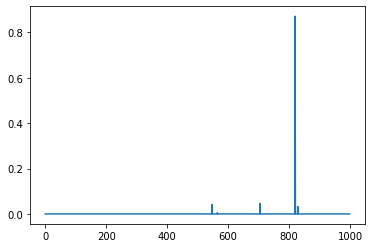

In [12]:
out = model.predict(im)
index = np.argmax(out)
print(index)

plt.plot(out.ravel())
plt.show()